In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
result = pd.read_csv("./datasets/titanic/result.csv")

可视化展示泰坦尼克号数据集中男女中生存人数分布情况

In [4]:
result.groupby(['Sex','Survived']).count()

Unnamed: 0  PassengerId  Pclass  Name  Age  SibSp  Parch  \
Sex    Survived                                                             
female 0                 81           81      81    81   64     81     81   
       1                233          233     233   233  197    233    233   
male   0                468          468     468   468  360    468    468   
       1                109          109     109   109   93    109    109   

                 Ticket  Fare  Cabin  Embarked  
Sex    Survived                                 
female 0             81    81      6        81  
       1            233   233     91       231  
male   0            468   468     62       468  
       1            109   109     45       109

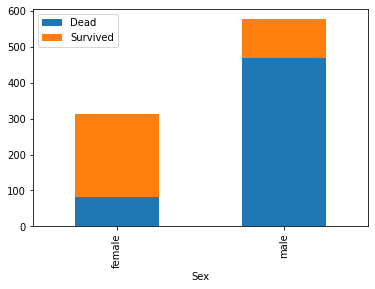

In [13]:
result.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar', stacked=True)
plt.legend(['Dead', 'Survived'])

性别和仓位等级的关系

<AxesSubplot:xlabel='Sex,Pclass'>

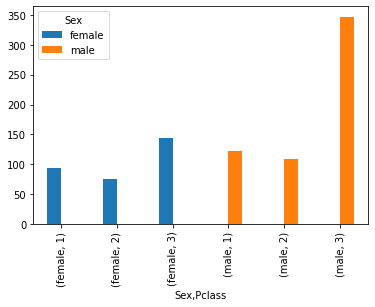

In [68]:
result.groupby(['Sex', 'Pclass'])['Sex'].value_counts().unstack().plot(kind='bar')

不同票价的人生存和死亡人数分布情况

横轴是不同票价，纵轴是存活人数

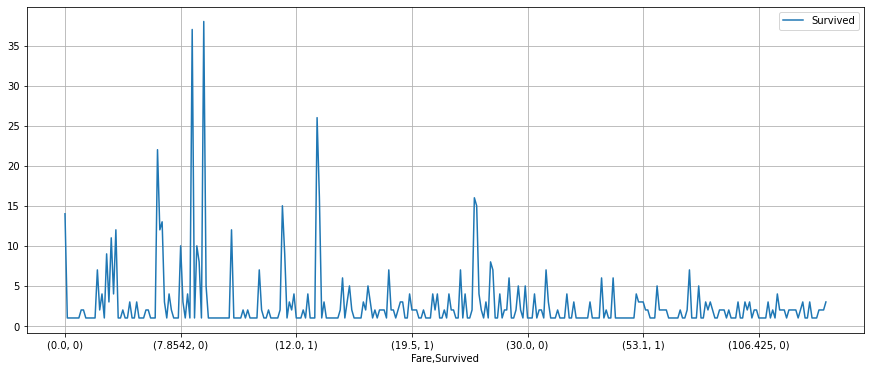

In [40]:
fig = plt.figure(figsize=(15, 6))
result.groupby('Fare')['Survived'].value_counts().plot(grid=True)
plt.legend()
plt.show()

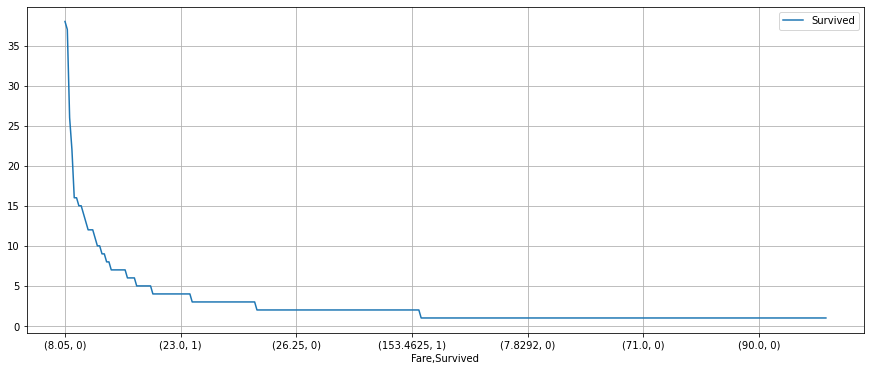

In [39]:
fig = plt.figure(figsize=(15, 6))
result.groupby('Fare')['Survived'].value_counts().sort_values(ascending=False).plot(grid=True)
plt.legend()
plt.show()

可视化展示泰坦尼克号数据集中不同仓位等级的人生存和死亡人员的分布情况。

自变量：仓位

因变量：生存与否

In [42]:
result.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

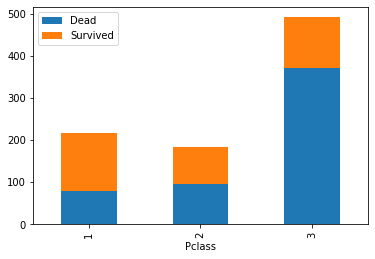

In [49]:
result.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.legend(['Dead', 'Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

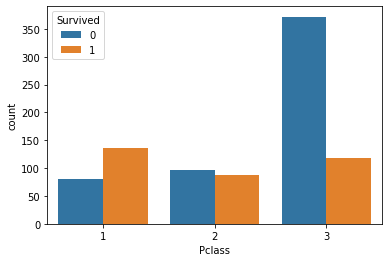

In [50]:
sns.countplot(x='Pclass', hue='Survived', data=result)

可视化展示泰坦尼克号数据集中不同年龄的人生存与死亡人数分布情况

In [53]:
result.groupby('Age')['Survived'].value_counts()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
                  ..
70.00  0           2
70.50  0           1
71.00  0           2
74.00  0           1
80.00  1           1
Name: Survived, Length: 142, dtype: int64

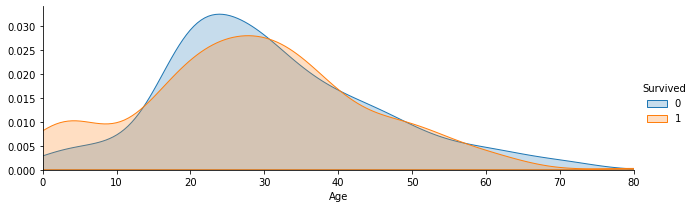

In [54]:
facet = sns.FacetGrid(result, hue='Survived', aspect=3)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, result['Age'].max()))
facet.add_legend()

可视化展示泰坦尼克号数据集中不同仓位等级的人年龄分布情况

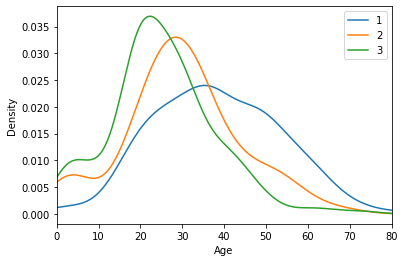

In [58]:
result.Age[result.Pclass == 1].plot(kind='kde')
result.Age[result.Pclass == 2].plot(kind='kde')
result.Age[result.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")
plt.xlim([0, result['Age'].max()])
plt.legend((1,2,3), loc="best")

分析：

在泰坦尼克数据集中，性别对生存的影响是：男性比女性的生存率更低；

仓位级别对生存的影响是：仓位级别越高，生存概率越大；

其中男性更多地购买了仓位低的3号票，可能是导致男性生存率低的原因之一；

年龄方面，小孩子的生存概率比老年人要高，年轻人反而生存率低；

仓位低的地方年轻人多。